## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "Resources/mouse_metadata.csv"

study_results_path = "Resources/study_results.csv"


# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merged_df=pd.merge(mouse_metadata, study_results, on=('Mouse ID'))


# Display the data table for preview

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.

merged_df['Mouse ID'].value_counts()


g989    13
a401    10
g570    10
j989    10
s508    10
        ..
h428     1
l872     1
f932     1
u153     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

k483    10
r604    10
j989    10
s508    10
g316    10
        ..
h428     1
l872     1
f932     1
u153     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sumstat_df= clean_df.groupby('Drug Regimen')


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tv_mean=sumstat_df["Tumor Volume (mm3)"].mean()

tv_median=sumstat_df["Tumor Volume (mm3)"].median()

tv_variance=sumstat_df["Tumor Volume (mm3)"].var()

tv_stddev=sumstat_df["Tumor Volume (mm3)"].std()

tv_sem=sumstat_df["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary dataframe.

summary_df=pd.DataFrame({"Mean": tv_mean, "Median": tv_median, "Variance": tv_variance, 
                         "Standard Deviation": tv_stddev, "SEM": tv_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sumstat_df= clean_df.groupby('Drug Regimen')


# Using the aggregation method, produce the same summary statistics in a single line


sumstat_df.aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

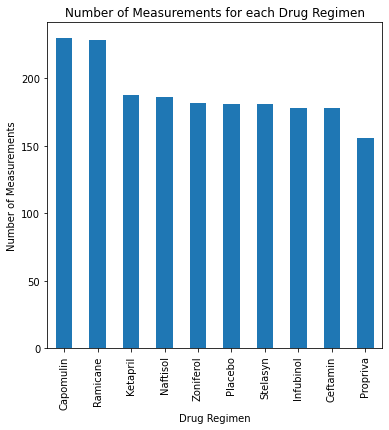

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bargraph=clean_df["Drug Regimen"].value_counts().plot(kind='bar',
                                                     figsize=(6,6),
                                                     title="Number of Measurements for each Drug Regimen")

bargraph.set_xlabel("Drug Regimen")
bargraph.set_ylabel("Number of Measurements")

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


##confused on this part

Text(0, 0.5, '')

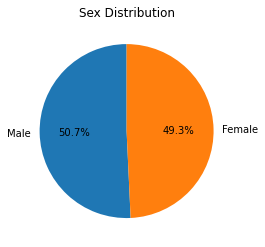

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex=clean_df["Sex"].value_counts()

piechart= sex.plot.pie(autopct="%1.1f%%", startangle=90, title='Sex Distribution')

piechart.set_ylabel('')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Again confused on this part

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
maxtimepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

maxtimepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mergeddf_2=pd.merge(clean_df, maxtimepoint_df, on="Mouse ID")

mergeddf_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [50]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)

tv_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loc_df=
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
